In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
from PIL import Image

### Here we try to present The Plots

In [2]:
# def plot_one(ax, npz_file, color=None):
#     a = np.load(npz_file)
#     assert len(a["timesteps"]) == len(a["results"])
#     x = a["timesteps"]
#     y = [rewards.mean() for rewards in a["results"][:]]
#     if color is not None:
#         ax.plot(x, y, color = color)
#     else:
#         ax.plot(x, y)
#     return

def plt_plot_one(npz_file, color=None):
    a = np.load(npz_file)
    assert len(a["timesteps"]) == len(a["results"])
    x = a["timesteps"]
    y = [rewards.mean() for rewards in a["results"][:]]
    print(y)
    if color is not None:
        plt.plot(x, y, color = color)
    else:
        plt.plot(x, y)
    return

def plot_dict(dict):
    for k in dict.keys():
        plt_plot_one(dict[k][0], dict[k][1])
    return

In [3]:
# npz_path = "/net/papilio/storage2/yhaoyuan/transformer_I2S/egs/RL_1_3/logs_reproduce_2048_no_sentence/evaluations.npz"
# npz_path = "/net/papilio/storage2/yhaoyuan/transformer_I2S/egs/RL_1_3/logs_ddpg_hard_img/evaluations.npz"
g = "gainsboro"
r = "red"
npz_paths_reproduce = {}
npz_paths_reproduce["logs_reproduce_50_no_sentence"] = ["./results/logs_reproduce_50_no_sentence/evaluations.npz", g]
npz_paths_reproduce["logs_reproduce_2048_no_sentence"] = ["./results/logs_reproduce_2048_no_sentence/evaluations.npz", g]
npz_paths_reproduce["logs_reproduce_50"] = ["./results/logs_reproduce_50/evaluations.npz", g]
npz_paths_reproduce["logs_reproduce_2048"] = ["./results/logs_reproduce_2048/evaluations.npz", g]

npz_paths_new = {}
npz_paths_new["logs_ddpg_hard_img"] = ["./results/logs_ddpg_hard_img/evaluations.npz", g]
npz_paths_new["logs_ddpg_hard_img_no_sentence"] = ["./results/logs_ddpg_hard_img_no_sentence/evaluations.npz", g]
npz_paths_new["logs_ddpg_soft_img_no_sentence"] = ["./results/logs_ddpg_soft_img_no_sentence/evaluations.npz", g]
npz_paths_new["logs_ddpg_record_choosepos"] = ["./results/logs_ddpg_record_choosepos/evaluations.npz", g]
npz_paths_new["logs_ddpg_new_fixed_image_no_sentence"] = ["./results/logs_ddpg_new_fixed_image_no_sentence/evaluations.npz", r]
npz_paths_new["logs_ddpg_new_fixed_image_8_sentence"] = ["./results/logs_ddpg_new_fixed_image_8_sentence/evaluations.npz", "b"]

npz_paths_hubert = {}
# npz_paths_hubert["logs_ddpg_256_hubert_no_sentence"] = ["./logs_ddpg_256_hubert_no_sentence/evaluations.npz", g]
# npz_paths_hubert["logs_ddpg_256_hubert_no_sentence_hard"] = ["./logs_ddpg_256_hubert_no_sentence_hard/evaluations.npz", g]
# npz_paths_hubert["logs_ddpg_256_hubert_no_sentence_sanity"] = ["./logs_ddpg_256_hubert_no_sentence_sanity/evaluations.npz", r]
# npz_paths_hubert["logs_ddpg_256_hubert_no_sentence_sanity_no_norm"] = ["./logs_ddpg_256_hubert_no_sentence_sanity_no_norm/evaluations.npz", r]
# npz_paths_hubert["logs_ddpg_256_hubert_no_sentence_sanity_pos"] = ["./logs_ddpg_256_hubert_no_sentence_sanity_pos/evaluations.npz", r]
npz_paths_hubert["logs_ddpg_256_baseline_VC_no_sentence_pos"] = ["./results/logs_ddpg_256_baseline_VC_no_sentence_pos/evaluations.npz", "b"]
npz_paths_hubert["logs_ddpg_256_hubert_VC_no_sentence_pos"] = ["./results/logs_ddpg_256_hubert_VC_no_sentence_pos/evaluations.npz", 'r']


[0.332, 0.368, 0.439, 0.486, 0.51, 0.52, 0.527, 0.57, 0.578, 0.553, 0.559, 0.591, 0.583, 0.568, 0.546, 0.591, 0.594, 0.572, 0.573, 0.57, 0.583, 0.581, 0.578, 0.553, 0.591, 0.569, 0.574, 0.564, 0.588, 0.558, 0.59, 0.576, 0.566, 0.57, 0.573, 0.577, 0.569, 0.578, 0.583, 0.563, 0.589, 0.563, 0.584]
[0.424, 0.452, 0.471, 0.531, 0.531, 0.593, 0.662, 0.678, 0.654, 0.713, 0.696, 0.716, 0.716, 0.714, 0.709, 0.72, 0.719, 0.714, 0.685, 0.707, 0.76, 0.737, 0.739, 0.714, 0.719, 0.731, 0.749, 0.742, 0.749, 0.738, 0.736, 0.724, 0.765, 0.746, 0.727, 0.711, 0.75, 0.736, 0.735, 0.748, 0.742, 0.727, 0.755, 0.738, 0.755, 0.697, 0.752, 0.737, 0.772, 0.78]


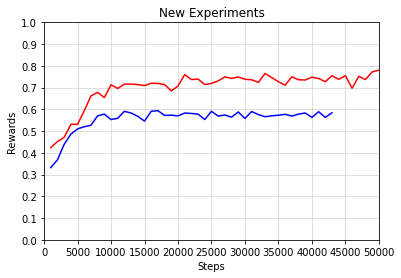

In [4]:
# Set figure
plt.figure()
plt.xlim([0,50000])
plt.ylim([0,1])
plt.xticks(np.linspace(0, 50000, 11))
plt.yticks(np.linspace(0, 1, 11))
plt.xlabel("Steps")
plt.ylabel("Rewards")
plt.title("New Experiments")
# ax.set_xsticks

plt.grid(which="major", alpha = 0.5)
plt.grid(which="minor", alpha = 0.1)
plot_dict(npz_paths_hubert)
# plt_plot_one(npz_path, 'gainsboro')
